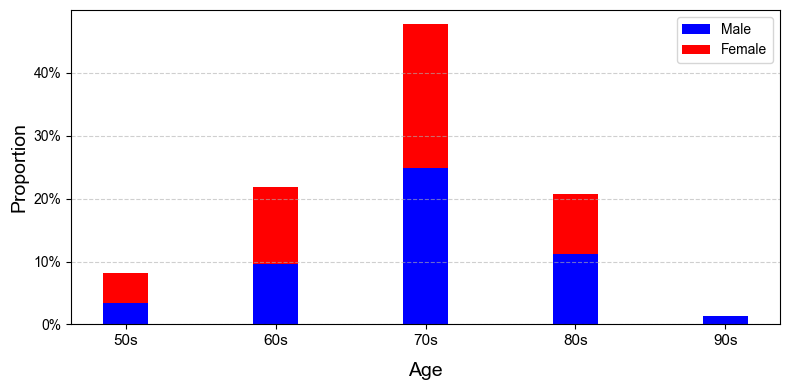

In [1]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['font.family'] = 'Arial'

data_dir = "graph"
age_bins = [(50, 59), (60, 69), (70, 79), (80, 89), (90, 99)]

age_labels = [f"{low}-{high}" for (low, high) in age_bins]
age_centers = [(low + high) / 2 for (low, high) in age_bins]
bar_width = 5  


age_gender_counts = defaultdict(lambda: {'m': 0, 'w': 0})


def extract_info(filename):
    match = re.match(r".+_(\d+)_([mw])\.jpg", filename)
    if match:
        age = int(match.group(1))
        gender = match.group(2)
        return age, gender
    return None, None


for gender_folder, gender in [('man', 'm'), ('woman', 'w')]:
    folder_path = os.path.join(data_dir, gender_folder)
    for person_folder in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_folder)
        if not os.path.isdir(person_path):
            continue
        for img_file in os.listdir(person_path):
            age, g = extract_info(img_file)
            if g == gender and age is not None:
                for i, (low, high) in enumerate(age_bins):
                    if low <= age <= high:
                        age_gender_counts[age_labels[i]][g] += 1
                        break


total_images = sum(
    age_gender_counts[label]['m'] + age_gender_counts[label]['w']
    for label in age_labels
)

male_ratios = [
    age_gender_counts[label]['m'] / total_images
    for label in age_labels
]

female_ratios = [
    age_gender_counts[label]['w'] / total_images
    for label in age_labels
]



x = range(len(age_labels))
bar_width = 0.8


plt.figure(figsize=(8, 4))


bar_positions = [low for (low, _) in age_bins]
bar_width = 3

plt.bar(bar_positions, male_ratios, width=bar_width, label='Male', color='blue', align='center')
plt.bar(bar_positions, female_ratios, width=bar_width, bottom=male_ratios, label='Female', color='red', align='center')

xtick_labels = [f"{(low // 10) * 10}s" for (low, _) in age_bins]
plt.xticks(bar_positions, xtick_labels, fontsize=11)

plt.ylim(0, 0.5)
plt.yticks([i/10 for i in range(0, 5)], [f"{i*10}%" for i in range(0, 5)])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel("Age", fontsize=14, labelpad=10)
plt.ylabel("Proportion", fontsize=14)
plt.tight_layout()
plt.savefig("figure_1.pdf", dpi=300)
